## Setup

In [5]:
import os 
import pandas as pd
import xlrd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib notebook

## Import Data

In [6]:
df = pd.read_excel ('default of credit card clients.xls',header = 1)

## Data Processing

### check missing values

In [7]:
df.shape[0] - df.dropna().shape[0]

0

- No missing values

### drop some redundant attributes

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
df.drop(columns = ['ID'],inplace = True)

In [10]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- History of past payment arrtibutes with negative record should be set 0, as it also means 'pay duly' according to the data description.
- Convert `SEX`, `EDUCATION` and `MARRIAGE` columns to category data, and delete invalid data.

In [11]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
pay_cols = [col.upper() for col in pay_cols]


for col in pay_cols:
    fil = (df[col] < 0)
    df.loc[fil, col] = 0

In [12]:
drop_id_1 = (df['EDUCATION'] != 1 ) & (df['EDUCATION'] != 2 ) & (df['EDUCATION'] != 3) & (df['EDUCATION'] != 4 )
drop_id_2 = (df['MARRIAGE'] != 1 ) & (df['MARRIAGE'] != 2 ) & (df['MARRIAGE'] != 3)
keep_id = -(drop_id_1 | drop_id_2)
df = df[keep_id]

In [13]:
df.loc[df['SEX'] == 1,'SEX'] = 'male'
df.loc[df['SEX'] == 2,'SEX'] = 'female'
df.loc[df['EDUCATION'] == 1,'EDUCATION'] = 'graduate'
df.loc[df['EDUCATION'] == 2,'EDUCATION'] = 'university'
df.loc[df['EDUCATION'] == 3,'EDUCATION'] = 'high'
df.loc[df['EDUCATION'] == 4,'EDUCATION'] = 'others'
df.loc[df['MARRIAGE'] == 1,'MARRIAGE'] = 'married'
df.loc[df['MARRIAGE'] == 2,'MARRIAGE'] = 'single'
df.loc[df['MARRIAGE'] == 3,'MARRIAGE'] = 'others'

In [14]:
df = pd.get_dummies(df)

In [15]:
df = df.astype(float)
df = df.dropna()
scale = MinMaxScaler()
df_to_scale = df
scaled = scale.fit_transform(df_to_scale)
scaled_df = pd.DataFrame(scaled, columns=df_to_scale.columns)

## Split data

In [16]:
test_size = round(0.2 * len(scaled_df))
train, test = train_test_split(scaled_df, test_size=test_size, random_state=0, shuffle=True)

label = 'default payment next month'

x_train, y_train = train.drop(label, axis=1), train[label]
x_test, y_test = test.drop(label, axis=1), test[label]

In [17]:
scaled_df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'SEX_female', 'SEX_male', 'EDUCATION_graduate', 'EDUCATION_high',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_married',
       'MARRIAGE_others', 'MARRIAGE_single'],
      dtype='object')

In [18]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((23681, 29), (23681,), (5920, 29), (5920,))

## SVM Models

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Text(0.5, 15.0, 'Predicted label')

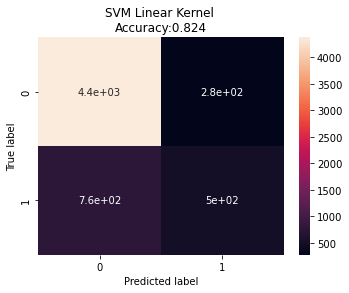

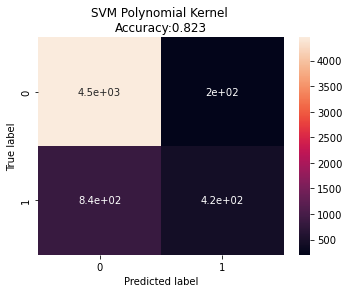

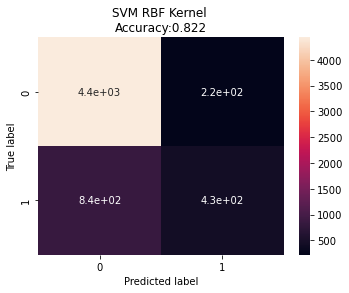

In [59]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = SVC(kernel = 'linear').fit(x_train, y_train)
clf_pred = clf.predict(x_test)
confusion = confusion_matrix(y_test, clf_pred)
df = pd.DataFrame(confusion,
                  index = [i for i in range(0,2)], 
                  columns = [i for i in range(0,2)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,clf_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

clf = SVC(kernel = 'poly').fit(x_train, y_train)
clf_pred = clf.predict(x_test)
confusion = confusion_matrix(y_test, clf_pred)
df = pd.DataFrame(confusion,
                  index = [i for i in range(0,2)], 
                  columns = [i for i in range(0,2)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df, annot=True)
plt.title('SVM Polynomial Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,clf_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

clf = SVC(kernel = 'rbf').fit(x_train, y_train)
clf_pred = clf.predict(x_test)
confusion = confusion_matrix(y_test, clf_pred)
df = pd.DataFrame(confusion, 
                  index = [i for i in range(0,2)],
                  columns = [i for i in range(0,2)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                    clf_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

<IPython.core.display.Javascript object>


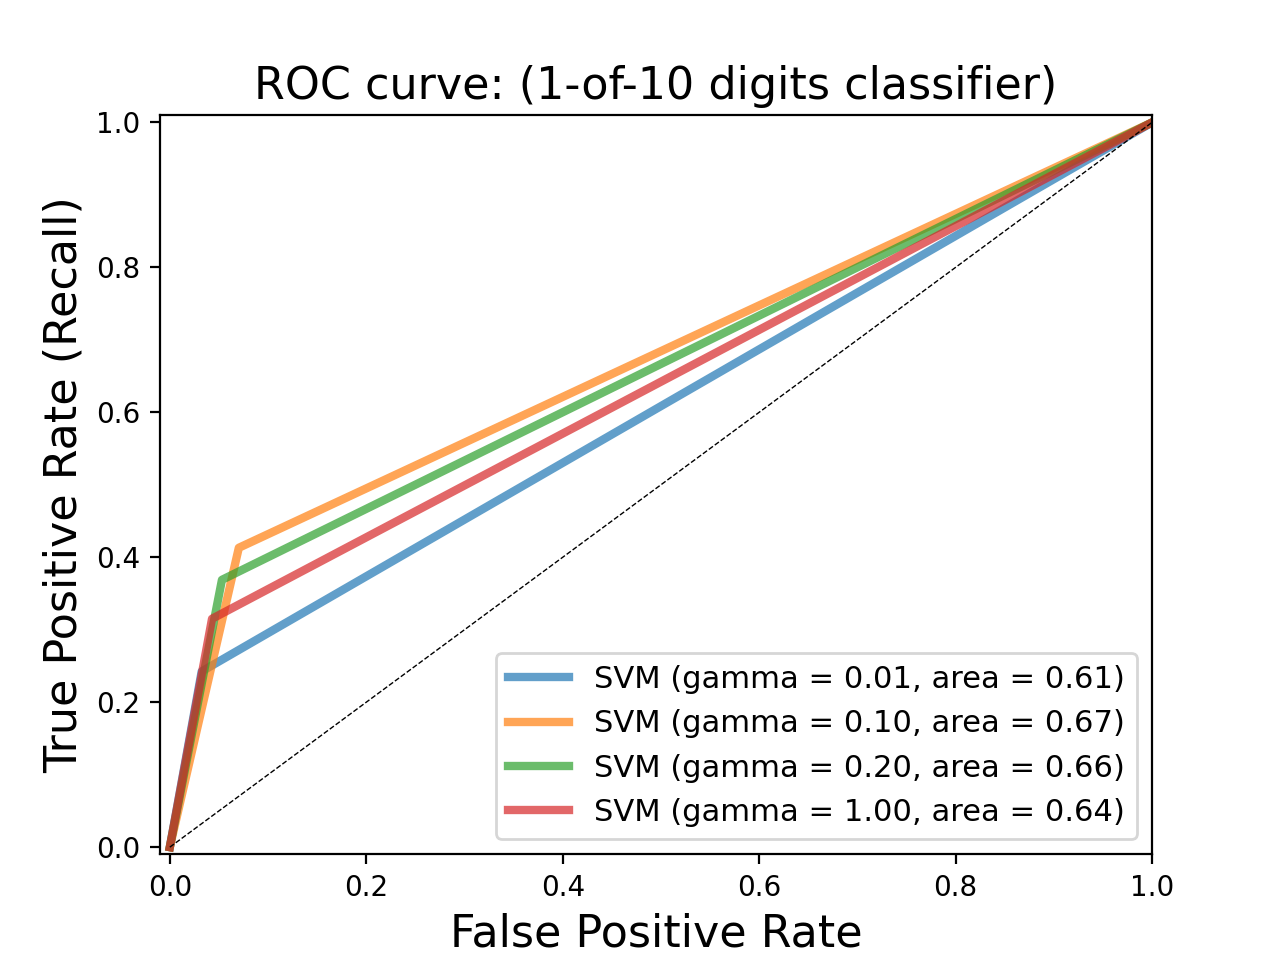

gamma = 0.01  accuracy = 0.81   AUC = 0.61
gamma = 0.10  accuracy = 0.82   AUC = 0.67
gamma = 0.20  accuracy = 0.82   AUC = 0.66
gamma = 1.00  accuracy = 0.82   AUC = 0.64


In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    clf = SVC(gamma=g).fit(x_train, y_train)
    pred = clf.predict(x_test)
    fpr, tpr, _  = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    accuracy = clf.score(x_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy, 
                                                                    roc_auc))
    plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)

plt.show()

In [61]:
# define model
clf = SVC(kernel='linear',gamma=0.1)

# train model
clf.fit(x_train, y_train)

# predict on test set
pred = clf.predict(x_test)

# get auc, fpr and tpr
fpr, tpr, _ = roc_curve(y_test.astype(int), pred)
roc_auc = auc(fpr, tpr)

# classification_report on test set
print(classification_report(clf.predict(x_test), y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89      5142
         1.0       0.40      0.64      0.49       778

    accuracy                           0.82      5920
   macro avg       0.67      0.75      0.69      5920
weighted avg       0.87      0.82      0.84      5920



Populating the interactive namespace from numpy and matplotlib


/Users/litianxing/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


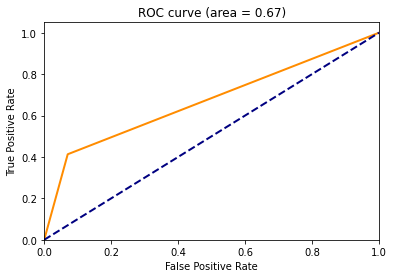

In [50]:
%pylab inline
plt.figure()
lw = 2

# plot roc auc curve
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve (area = %0.2f)" % roc_auc)
plt.show()

It can be seen from the results that SVM has learned certain rules on this data set, and the two types of samples in the data set can be distinguished. However, due to the imbalance of data set categories, the accuracy of SVM on category 0 is higher than that of category 1. Later, we can consider sampling the dataset and verify the model accuracy again.